# Trawling tracks visualization

Steps :

1.  Load `Echointegration.mat` and `echointegration_trawl_mask.mat` for a given test trawl (`EI000_MICRO_59b` in ABRAÇOS 2). Use the [**`h5py`**](https://docs.h5py.org/en/stable/) library.
2.  Investigate object structure.
3.  Simple visualization.
4.  If possible:
    -   Load ABRAÇOS 2 acoustic netCDF file (for the leg corresponding to the ).
    -   Add trawling track as a layer.
    -   Visualize.
    -   Write the netCDF in `data/processed`.
    -   Automate conversion.

In [ ]:
# Ensure correct path referencing
import sys
from pathlib import Path

root = Path().cwd().parent
sys.path.append(str(root))

In [24]:
# Load trawling track data
import h5py

ei_file_path = "../data/raw/trawling-tracks/test/EI000_MICRO_59b/Echointegration.mat"

with h5py.File(ei_file_path, "r") as f:
    for key in f.keys():
        obj = f[key]
        if hasattr(obj, "shape"):
            print(f"{key:40s} | shape: {obj.shape} | dtype: {obj.dtype}")
        else:
            print(f"{key:40s} | type: {type(obj)}")

Bottom                                   | shape: (1111, 4) | dtype: float64
BottomShift                              | shape: (1, 1) | dtype: float64
CumulatedGPSDistanceMeter                | shape: (1111, 1) | dtype: float64
DateTime                                 | shape: (23, 1111) | dtype: uint16
DurationApplyTreatmentInMin              | shape: (1, 1) | dtype: float64
EILowThreshold                           | shape: (1, 1) | dtype: float64
EIParameters                             | type: <class 'h5py._hl.group.Group'>
EsuPingStartEnd                          | shape: (1111, 2) | dtype: float64
FMFreqHz                                 | shape: (4, 1) | dtype: float64
FMFreqId                                 | shape: (2,) | dtype: uint64
FMFreqValid                              | shape: (2,) | dtype: uint64
FMNumberFreqByTransducer                 | shape: (4, 1) | dtype: float64
FilterEIAfterMinBottom                   | shape: (1, 1) | dtype: float64
FrequencySort             

In [86]:
import numpy as np
from datetime import datetime, timezone
import matplotlib.pyplot as plt

with h5py.File(ei_file_path, 'r') as f:
        sv = np.array(f['Sv_surface'])
        channels = np.array(f['FMFreqHz']).T.squeeze()/1e3
        depth = np.array(f['depth_surface'])
        time = np.array(f['Time']).squeeze()

print(f"Sv_surface shape: {sv.shape}")
print(f"depth_surface shape: {depth.shape}")
print(f"Channels (kHz): {channels}")

time_formatted = [datetime.fromtimestamp(t, tz=timezone.utc) for t in time]

Sv_surface shape: (4, 1111, 1400)
depth_surface shape: (1, 1400)
Channels (kHz): [ 38.  70. 120. 200.]


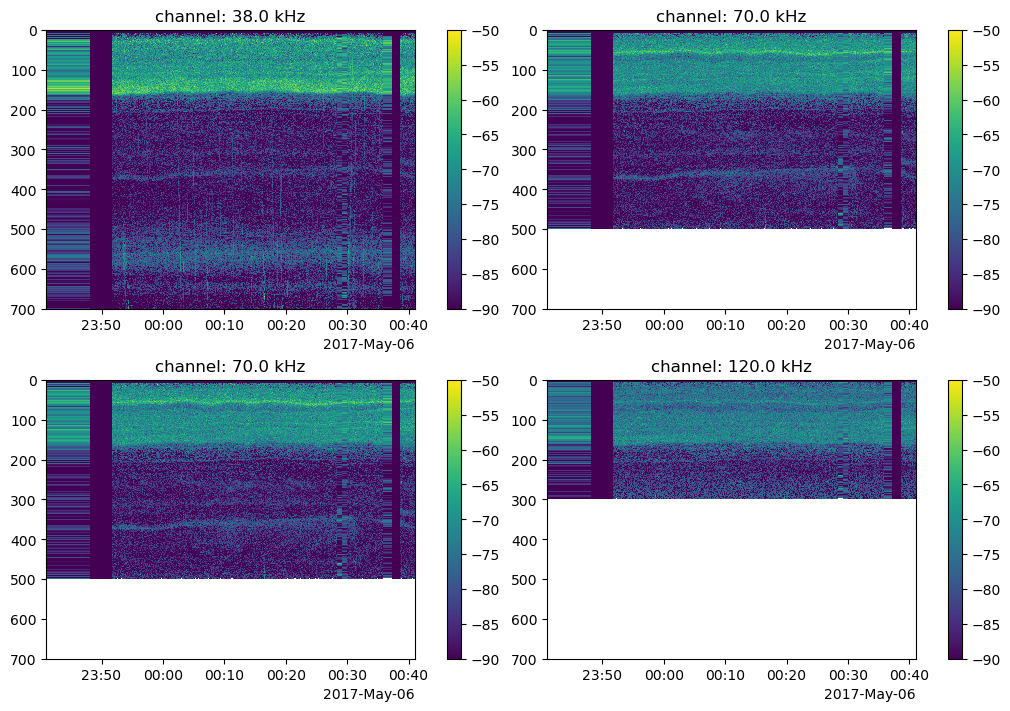

In [95]:
from matplotlib.dates import ConciseDateFormatter

c, w, h = sv.shape

X, Y = np.meshgrid(time_formatted, depth[::-1])

fig, axs = plt.subplots(2, 2, layout='constrained', figsize=(10, 7))

for i in range(2):
    for j in range(2):
          
          Z = sv[i+j].T

          img = axs[i, j].pcolormesh(X, Y, Z, vmin=-90, vmax=-50)
          axs[i, j].set_title(f"channel: {channels[i+j]} kHz")
          axs[i, j].xaxis.set_major_formatter(ConciseDateFormatter(axs[i, j].xaxis.get_major_locator()))
          axs[i, j].yaxis.set_inverted(True)
          fig.colorbar(img, ax = axs[i, j])